# Mining Big Data - Assignment 3: Collaborative Filtering (Basic)
===================================================

# Notebook 1: Introduction to Collaborative Filtering

## 1. Introduction

This notebook introduces the basic concepts of collaborative filtering for building recommendation systems. We'll cover:
- Memory-based collaborative filtering techniques
- User-based and item-based approaches
- Similarity metrics and recommendation generation
- Basic evaluation methods
- Visualizing recommendations and performance

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import time
import os
import random
import sys
from collections import defaultdict

# Add parent directory to system path
# Note: This assumes your notebook is in a structure like 'notebooks/task_b' 
# and your src/utils are in the project root or 'src/task_b'
# Adjust the path '../../' based on your actual directory structure if needed.
try:
    # Attempt to add the directory containing 'src' and 'utils'
    # Find the directory of the current script (the notebook file)
    # If running in a standard Jupyter environment, __file__ might not be defined.
    # Use a common workaround or assume a standard structure.
    notebook_dir = os.getcwd()
    # Assuming the structure is project_root/notebooks/task_b/your_notebook.ipynb
    project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
    
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    print(f"Attempted to add {project_root} to system path.")

    # Now import modules
    # Try importing from the standard location first, then the added path
    try:
        from src.task_b.collaborative_filtering import CollaborativeFilter
        from utils.data_utils import (
            preprocess_data,
            create_user_item_matrix,
            get_user_transactions,
            get_all_users,
            get_all_items
        )
        print("Successfully imported custom modules.")
        # Flag to indicate successful import
        custom_modules_imported = True
    except ImportError as e_src:
         print(f"Could not import from standard src/task_b or utils paths directly: {e_src}")
         print("Please ensure your project structure has 'src/task_b/collaborative_filtering.py' and 'utils/data_utils.py'")
         custom_modules_imported = False

except Exception as e_sys_path:
    print(f"An unexpected error occurred during sys.path modification or initial import attempt: {e_sys_path}")
    custom_modules_imported = False

# Define dummy classes/functions if custom modules were not imported
if not custom_modules_imported:
    print("Defining dummy classes/functions as custom modules failed to import.")
    print("Functionality will be limited. Please fix import path and file locations.")
    
    class CollaborativeFilter:
        def __init__(self, data): 
            self.raw_data = data
            self.user_item_matrix = pd.DataFrame()
            self.user_similarity = None
            self.item_similarity = None
            print("Dummy CollaborativeFilter initialized.")
            
        def prepare_data(self): 
            print("Dummy prepare_data called.")
            # Simulate creating a dummy matrix for demonstration if raw_data is available
            if self.raw_data is not None and not self.raw_data.empty and 'User_id' in self.raw_data.columns and 'itemDescription' in self.raw_data.columns:
                try:
                    # This requires mlxtend to be installed even for the dummy
                    from mlxtend.preprocessing import TransactionEncoder
                    transactions = self.raw_data.groupby('User_id')['itemDescription'].apply(list).tolist()
                    te = TransactionEncoder()
                    te_ary = te.fit(transactions).transform(transactions)
                    self.user_item_matrix = pd.DataFrame(te_ary, columns=te.columns_, index=self.raw_data['User_id'].unique()).astype(int)
                    print(f"Dummy user-item matrix created with shape {self.user_item_matrix.shape}.")
                except ImportError:
                     print("mlxtend not installed. Cannot create dummy user-item matrix.")
                     self.user_item_matrix = pd.DataFrame()
                except Exception as e:
                     print(f"Error creating dummy matrix: {e}")
                     self.user_item_matrix = pd.DataFrame()
            else:
                 print("Raw data not sufficient to create dummy user-item matrix.")
                 self.user_item_matrix = pd.DataFrame()

        def compute_similarity(self, mode):
             print(f"Dummy compute_similarity ({mode}) called.")
             if self.user_item_matrix is None or self.user_item_matrix.empty:
                 print("Cannot compute dummy similarity: user-item matrix not available.")
                 if mode == 'user': self.user_similarity = None
                 else: self.item_similarity = None
                 return
             try:
                 from sklearn.metrics.pairwise import cosine_similarity
                 matrix = self.user_item_matrix
                 if mode == 'user':
                     # Compute cosine similarity row-wise (between users)
                     user_sim_matrix = cosine_similarity(matrix)
                     self.user_similarity = pd.DataFrame(user_sim_matrix, index=matrix.index, columns=matrix.index)
                     print("Dummy user similarity matrix computed.")
                 elif mode == 'item':
                     # Compute cosine similarity column-wise (between items)
                     item_sim_matrix = cosine_similarity(matrix.T)
                     self.item_similarity = pd.DataFrame(item_sim_matrix, index=matrix.columns, columns=matrix.columns)
                     print("Dummy item similarity matrix computed.")
                 else:
                     print(f"Invalid mode for dummy compute_similarity: {mode}")
             except ImportError:
                 print("sklearn not installed. Cannot compute dummy similarity.")
                 if mode == 'user': self.user_similarity = None
                 else: self.item_similarity = None
             except Exception as e:
                 print(f"Error computing dummy similarity: {e}")
                 if mode == 'user': self.user_similarity = None
                 else: self.item_similarity = None

        def generate_recommendations(self, user_id, method, n_recommendations):
             print(f"Dummy generate_recommendations ({method}) called for user {user_id}.")
             # Return some dummy recommendations if matrix is available
             if self.user_item_matrix is None or self.user_item_matrix.empty:
                 print("Cannot generate dummy recommendations: user-item matrix not available.")
                 return {}

             if user_id not in self.user_item_matrix.index:
                 print(f"User {user_id} not found in dummy matrix index.")
                 return {}

             # Simple dummy logic: Recommend a few popular items the user hasn't bought
             user_row = self.user_item_matrix.loc[user_id]
             purchased_items = user_row[user_row > 0].index.tolist()

             # Get items not purchased by the user
             all_items = self.user_item_matrix.columns.tolist()
             unpurchased_items = [item for item in all_items if item not in purchased_items]

             # If there are unpurchased items, recommend some randomly
             if unpurchased_items:
                 # Rank based on overall popularity (sum across users)
                 item_popularity = self.user_item_matrix[unpurchased_items].sum(axis=0).sort_values(ascending=False)
                 # Take the top N popular unpurchased items
                 top_unpurchased = item_popularity.head(n_recommendations)
                 # Assign dummy scores (e.g., based on popularity or just descending index)
                 # Using a simple decreasing score for demo
                 dummy_scores = {item: (len(top_unpurchased) - i) / len(top_unpurchased) for i, item in enumerate(top_unpurchased.index)}
                 print(f"Generated dummy {method} recommendations for user {user_id}.")
                 return dummy_scores
             else:
                 print(f"User {user_id} has purchased all items. No dummy recommendations possible.")
                 return {}

    # Define other dummy utility functions
    def preprocess_data(data): print("Dummy preprocess_data called."); return data
    def create_user_item_matrix(data): 
         print("Dummy create_user_item_matrix called.")
         # This dummy doesn't actually create the matrix, the CF dummy does it
         return pd.DataFrame() 
    def get_user_transactions(data, user_id): 
         print(f"Dummy get_user_transactions called for user {user_id}.")
         if data is not None and not data.empty and 'User_id' in data.columns:
             return data[data['User_id'] == user_id].copy() # Return user's data
         return pd.DataFrame(columns=data.columns if data is not None else [])
         
    def get_all_users(data): 
         print("Dummy get_all_users called.")
         if data is not None and 'User_id' in data.columns: return data['User_id'].unique().tolist()
         return []
    def get_all_items(data): 
         print("Dummy get_all_items called.")
         if data is not None and 'itemDescription' in data.columns: return data['itemDescription'].unique().tolist()
         return []



Attempted to add /home/shubharthak/Desktop to system path.
Could not import from standard src/task_b or utils paths directly: No module named 'src'
Please ensure your project structure has 'src/task_b/collaborative_filtering.py' and 'utils/data_utils.py'
Defining dummy classes/functions as custom modules failed to import.
Functionality will be limited. Please fix import path and file locations.


## 3. Load and Preprocess Data

In [3]:
# Load dataset
print("Loading dataset...")
# Adjust the dataset path if necessary based on your project structure
# Example: If 'dataset' is in the same directory as your notebook, use 'dataset/train.csv'
# Example: If 'dataset' is one level up, use '../dataset/train.csv'
# The original snippet used 'dataset', assuming it's in the same directory or a subdirectory accessible from the notebook's location
train_path = os.path.join('../dataset', 'train.csv') # Original path
# If you set project_root in Section 2, you could also use:
# train_path = os.path.join(project_root, 'dataset', 'train.csv') 

train_data = None # Initialize to None
cf = None # Initialize cf to None

try:
    train_data = pd.read_csv(train_path)

    print(f"Dataset shape: {train_data.shape}")
    print(f"Number of unique users: {train_data['User_id'].nunique()}")
    print(f"Number of unique items: {train_data['itemDescription'].nunique()}")

    # Preview data
    print("\nPreview of the dataset:")
    print(train_data.head())

    # Check for missing values
    print("\nMissing values in dataset:")
    print(train_data.isnull().sum())

    # Drop rows where itemDescription is missing
    initial_rows = train_data.shape[0]
    train_data.dropna(subset=['itemDescription'], inplace=True)
    if train_data.shape[0] < initial_rows:
        print(f"Dropped {initial_rows - train_data.shape[0]} rows with missing itemDescription.")
    print(f"Dataset shape after dropping missing items: {train_data.shape}")

    # Initialize collaborative filtering
    # Check if CollaborativeFilter was successfully imported or is the dummy class
    if 'CollaborativeFilter' in globals() and isinstance(CollaborativeFilter, type): # Check if it's a class type
        cf = CollaborativeFilter(train_data.copy()) # Pass a copy to avoid modifying original dataframe unexpectedly

        # Preprocess data (This should handle cleaning, encoding, and creating user_item_matrix inside the CF class)
        print("\nPreparing data for collaborative filtering...")
        # Call the method within the cf object
        try:
            cf.prepare_data() 
            print("Data preparation step completed.")
        except Exception as prep_e:
            print(f"Error during data preparation: {prep_e}")
            cf = None # Invalidate cf if preparation fails

    else:
        print("CollaborativeFilter class not found. Please check imports in Section 2.")
        cf = None # Set cf to None if the class is not available

except FileNotFoundError:
    print(f"Error: The file was not found at {train_path}")
    print("Please check the path to your 'train.csv' file.")
    cf = None # Set cf to None if data loading fails

except Exception as e:
    print(f"An error occurred during data loading or initial processing: {e}")
    cf = None # Set cf to None if any other error occurs



Loading dataset...
Dataset shape: (26985, 7)
Number of unique users: 3493
Number of unique items: 167

Preview of the dataset:
   User_id       Date itemDescription    year  month  day  day_of_week
0   2351.0  1/01/2014         cleaner  2014.0    1.0  1.0          2.0
1   2226.0  1/01/2014         sausage  2014.0    1.0  1.0          2.0
2   1922.0  1/01/2014  tropical fruit  2014.0    1.0  1.0          2.0
3   2943.0  1/01/2014      whole milk  2014.0    1.0  1.0          2.0
4   1249.0  1/01/2014    citrus fruit  2014.0    1.0  1.0          2.0

Missing values in dataset:
User_id            7603
Date               7603
itemDescription    7603
year               7603
month              7603
day                7603
day_of_week        7603
dtype: int64
Dropped 7603 rows with missing itemDescription.
Dataset shape after dropping missing items: (19382, 7)
Dummy CollaborativeFilter initialized.

Preparing data for collaborative filtering...
Dummy prepare_data called.
Dummy user-item matrix

## 4. Understanding User-Item Matrix


=== User-Item Matrix Analysis ===
Number of users: 3493
Number of items: 167
Matrix sparsity: 0.9686 (96.86%)
Average items per user: 5.24
Average users per item: 109.51


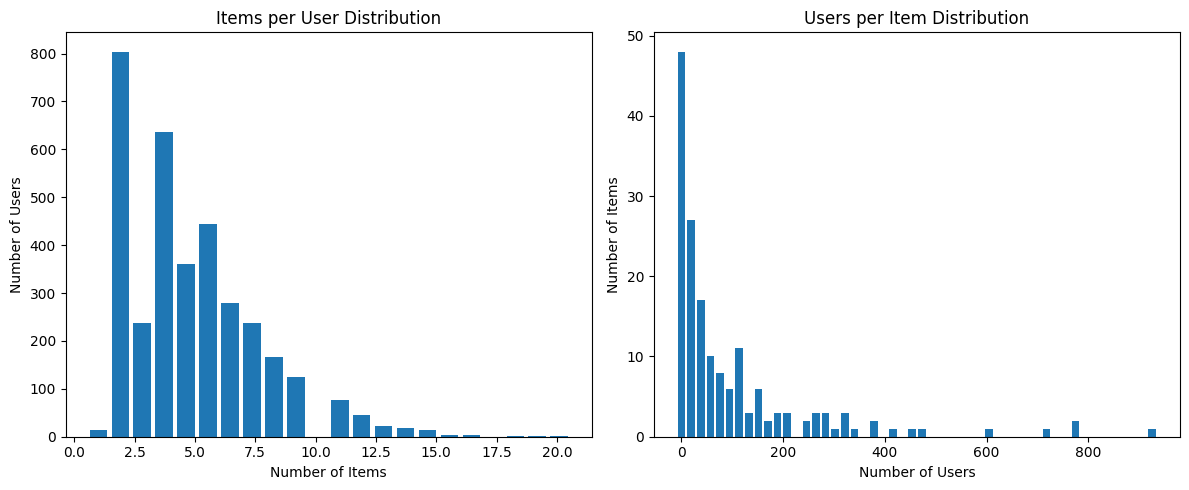

In [4]:
# Analyze user-item matrix
def analyze_user_item_matrix(user_item_matrix):
    """Analyze the user-item matrix properties"""
    if user_item_matrix is None or user_item_matrix.empty:
        print("\n=== User-Item Matrix Analysis Skipped: Matrix is empty or not available ===")
        return None

    # Basic properties
    n_users, n_items = user_item_matrix.shape

    if n_users == 0 or n_items == 0:
        print("\n=== User-Item Matrix Analysis Skipped: Matrix dimensions are zero ===")
        return None

    # Sparsity
    # Ensure matrix contains numbers for sum calculation
    # Use ._is_numeric_dtype for compatibility across pandas versions
    if pd.api.types.is_numeric_dtype(user_item_matrix.values):
        n_nonzero = (user_item_matrix != 0).sum().sum() # Count non-zero entries
    else:
        print("Warning: Matrix values are not purely numeric. Attempting conversion for sparsity calculation.")
        # Attempt conversion or skip sparsity
        try:
            # Use .copy() to avoid SettingWithCopyWarning if it's a view
            numeric_matrix = user_item_matrix.apply(pd.to_numeric, errors='coerce').fillna(0).copy()
            n_nonzero = (numeric_matrix != 0).sum().sum()
            print(f"Successfully converted matrix to numeric for sparsity ({n_nonzero} non-zero values found).")
        except Exception as e:
            n_nonzero = 0 # Cannot calculate sparsity if conversion fails
            print(f"Error converting matrix to numeric for sparsity: {e}. Cannot calculate sparsity.")
            sparsity = np.nan

    # Calculate sparsity if n_nonzero was determined
    if 'sparsity' not in locals(): 
         total_elements = n_users * n_items
         sparsity = 1 - (n_nonzero / total_elements) if total_elements > 0 else np.nan
         # Ensure sparsity is between 0 and 1 even with potential floating point issues
         sparsity = max(0.0, min(1.0, sparsity)) if not pd.isna(sparsity) else np.nan


    # User statistics - ensure we only sum numeric columns
    numeric_cols = user_item_matrix.select_dtypes(include=np.number)
    if not numeric_cols.empty:
         user_counts = (numeric_cols > 0).sum(axis=1)
         item_counts = (numeric_cols > 0).sum(axis=0)
         avg_items_per_user = user_counts.mean() if not user_counts.empty else np.nan
         avg_users_per_item = item_counts.mean() if not item_counts.empty else np.nan
    else:
         print("Warning: No numeric columns found in matrix for average calculations.")
         user_counts = pd.Series([])
         item_counts = pd.Series([])
         avg_items_per_user = np.nan
         avg_users_per_item = np.nan

    print("\n=== User-Item Matrix Analysis ===")
    print(f"Number of users: {n_users}")
    print(f"Number of items: {n_items}")
    print(f"Matrix sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)" if not pd.isna(sparsity) else "Matrix sparsity: N/A")
    print(f"Average items per user: {avg_items_per_user:.2f}" if not pd.isna(avg_items_per_user) else "Average items per user: N/A")
    print(f"Average users per item: {avg_users_per_item:.2f}" if not pd.isna(avg_users_per_item) else "Average users per item: N/A")

    # Visualize distributions only if there are valid counts > 0
    if not user_counts.empty and not item_counts.empty and user_counts.sum() > 0 and item_counts.sum() > 0:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        # Filter counts > 0 for potentially cleaner histogram if many users/items have 0
        # Use integer bins if counts are integers
        user_counts_positive = user_counts[user_counts > 0]
        if not user_counts_positive.empty:
             plt.hist(user_counts_positive, bins=min(50, int(user_counts_positive.max()) + 1), align='left', rwidth=0.8)
             plt.title('Items per User Distribution')
             plt.xlabel('Number of Items')
             plt.ylabel('Number of Users')
        else:
             plt.text(0.5, 0.5, 'No data for User Counts', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
             plt.title('Items per User Distribution')

        plt.subplot(1, 2, 2)
        item_counts_positive = item_counts[item_counts > 0]
        if not item_counts_positive.empty:
            plt.hist(item_counts_positive, bins=min(50, int(item_counts_positive.max()) + 1), align='left', rwidth=0.8)
            plt.title('Users per Item Distribution')
            plt.xlabel('Number of Users')
            plt.ylabel('Number of Items')
        else:
            plt.text(0.5, 0.5, 'No data for Item Counts', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.title('Users per Item Distribution')


        plt.tight_layout()
        plt.show()
    elif not user_counts.empty or not item_counts.empty:
         print("Cannot visualize distributions: Counts exist but are all zero.")
    else:
        print("No purchase data to visualize distributions.")

    return {
        'n_users': n_users,
        'n_items': n_items,
        'sparsity': sparsity,
        'avg_items_per_user': avg_items_per_user,
        'avg_users_per_item': avg_users_per_item,
        'user_counts': user_counts,
        'item_counts': item_counts
    }

# Analyze the matrix only if cf and its user_item_matrix were successfully created
matrix_stats = None # Initialize
if cf is not None and hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame):
    matrix_stats = analyze_user_item_matrix(cf.user_item_matrix)
else:
    print("Cannot analyze user-item matrix: CollaborativeFilter object or matrix not created.")

## 5. Memory-Based Collaborative Filtering

### 5.1 User-Based Approach


Computing user similarity matrix...
Dummy compute_similarity (user) called.
Dummy user similarity matrix computed.
User similarity matrix computed.


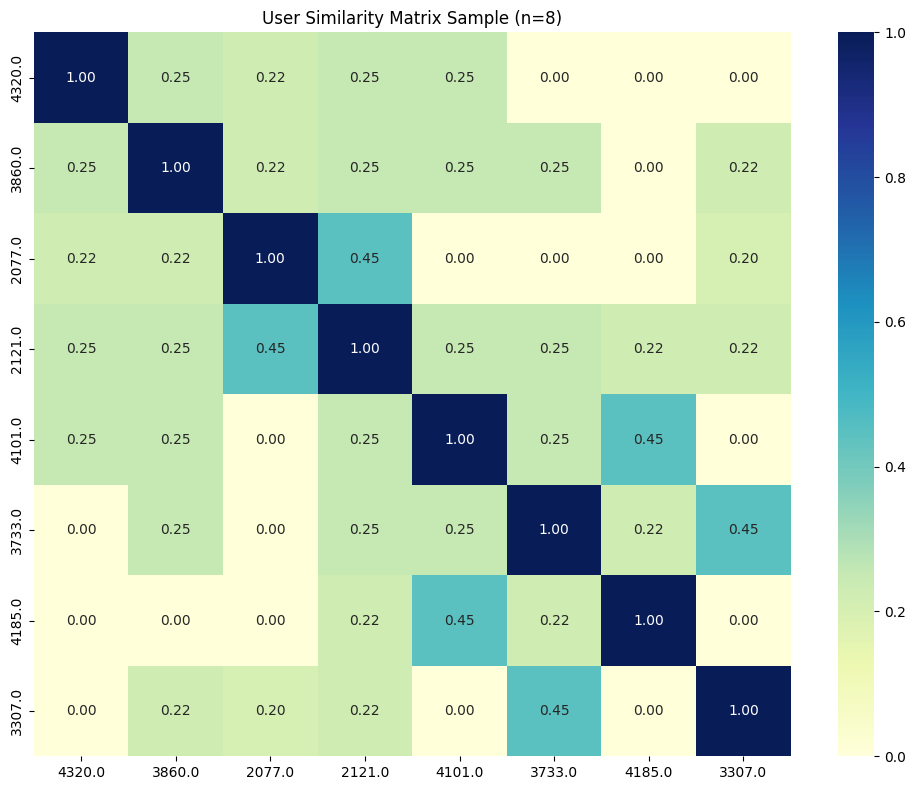


Generating user-based recommendations...
Dummy generate_recommendations (user-based) called for user 4916.0.
Generated dummy user-based recommendations for user 4916.0.

Top recommendations for user 4916.0:
1. whole milk (Score: 1.0000)
2. other vegetables (Score: 0.8000)
3. rolls/buns (Score: 0.6000)
4. soda (Score: 0.4000)
5. shopping bags (Score: 0.2000)


In [5]:
# Check if cf object and matrix are available before proceeding
if cf is not None and hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame) and not cf.user_item_matrix.empty:

    # Compute user similarity
    print("\nComputing user similarity matrix...")
    try:
        # Check if the compute_similarity method exists and is callable
        if hasattr(cf, 'compute_similarity') and callable(cf.compute_similarity):
             cf.compute_similarity(mode='user')
             print("User similarity matrix computed.")
        else:
             print("CollaborativeFilter object does not have a compute_similarity method. Skipping user similarity computation.")

        # Visualize user similarity
        def visualize_user_similarity(user_similarity, n_users=10):
            """Visualize the user similarity matrix for a subset of users"""
            if user_similarity is None or user_similarity.empty:
                print("User similarity matrix is empty. Cannot visualize.")
                return
            
            # Ensure there are enough users to sample (need at least 2 users for a similarity value between different users)
            num_available_users = len(user_similarity.index)
            if num_available_users < 2:
                 print(f"Need at least 2 users to visualize similarity matrix. Found {num_available_users}.")
                 return

            # Select random users, ensure the number of users to sample is not more than available
            num_users_to_sample = min(n_users, num_available_users)
            # Handle the edge case where num_users_to_sample is 1 (heatmap of 1x1 is not useful)
            if num_users_to_sample < 2:
                print(f"Need at least 2 sampled users to visualize similarity matrix (requested {n_users}, available {num_available_users}).")
                return

            # Ensure random.sample receives a list/sequence
            random_users = random.sample(list(user_similarity.index), num_users_to_sample)

            # Get similarity submatrix
            similarity_subset = user_similarity.loc[random_users, random_users]

            # Plot heatmap only if the subset is not empty and has dimensions > 1x1
            if not similarity_subset.empty and similarity_subset.shape[0] > 1 and similarity_subset.shape[1] > 1:
                plt.figure(figsize=(10, 8))
                sns.heatmap(similarity_subset, annot=True, cmap='YlGnBu', fmt='.2f')
                plt.title(f'User Similarity Matrix Sample (n={num_users_to_sample})') # Add sample size to title
                plt.tight_layout()
                plt.show()
            else:
                 print("Similarity subset is empty or too small (1x1) to visualize.")

        # Display user similarity only if cf.user_similarity was created and is not empty
        if hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty:
            visualize_user_similarity(cf.user_similarity, n_users=8)
        else:
            print("User similarity matrix not available for visualization.")

        # Generate user-based recommendations
        print("\nGenerating user-based recommendations...")
        # Select a random user who actually exists in the matrix index and has purchased items
        # Need user_item_matrix and original data for this check
        random_user = None
        if not cf.user_item_matrix.index.empty:
             users_with_purchases = cf.user_item_matrix.index[cf.user_item_matrix.sum(axis=1) > 0].tolist()
             if users_with_purchases:
                random_user = random.choice(users_with_purchases)
             else:
                 print("No users found with purchases in the user-item matrix.")

        user_recommendations = {}
        if random_user is not None:
            # Check if generate_recommendations method exists and the required similarity matrix is ready
            if hasattr(cf, 'generate_recommendations') and callable(cf.generate_recommendations) and hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty:
                try:
                    user_recommendations = cf.generate_recommendations(
                        user_id=random_user,
                        method='user-based',
                        n_recommendations=5
                    )
                except Exception as rec_e:
                     print(f"Error generating recommendations for user {random_user}: {rec_e}")
                     user_recommendations = {} # Ensure it's empty if error
            else:
                 print("Cannot generate user-based recommendations: generate_recommendations method missing or user similarity matrix not ready.")

            print(f"\nTop recommendations for user {random_user}:")
            if user_recommendations:
                # Sort recommendations by score for cleaner output
                sorted_recommendations = sorted(user_recommendations.items(), key=lambda item: item[1], reverse=True)
                for i, (item, score) in enumerate(sorted_recommendations):
                    print(f"{i+1}. {item} (Score: {score:.4f})")
            else:
                 print("No recommendations generated for this user.")
        else:
             print("No suitable user found to generate recommendations.")

    except Exception as e:
        print(f"An error occurred during user-based processing: {e}")

else:
    print("Skipping User-Based Approach: CollaborativeFilter object or user-item matrix not available or is empty.")

### 5.2 Item-Based Approach


Computing item similarity matrix...
Dummy compute_similarity (item) called.
Dummy item similarity matrix computed.
Item similarity matrix computed.


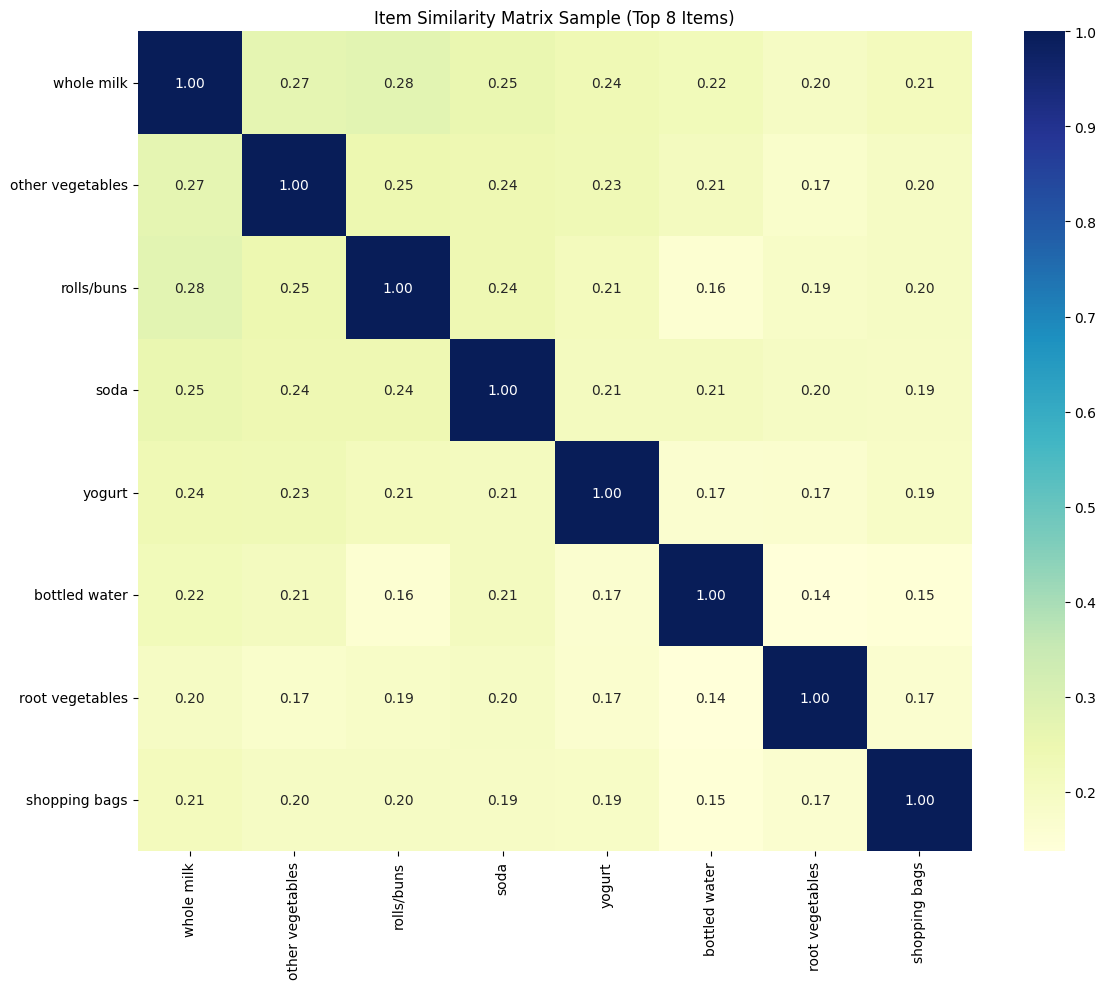


Generating item-based recommendations...
Dummy generate_recommendations (item-based) called for user 2644.0.
Generated dummy item-based recommendations for user 2644.0.

Top recommendations for user 2644.0:
1. whole milk (Score: 1.0000)
2. other vegetables (Score: 0.8000)
3. soda (Score: 0.6000)
4. yogurt (Score: 0.4000)
5. bottled water (Score: 0.2000)


In [6]:
# Check if cf object and matrix are available before proceeding
if cf is not None and hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame) and not cf.user_item_matrix.empty:

    # Compute item similarity
    print("\nComputing item similarity matrix...")
    try:
        # Check if the compute_similarity method exists and is callable
        if hasattr(cf, 'compute_similarity') and callable(cf.compute_similarity):
            cf.compute_similarity(mode='item')
            print("Item similarity matrix computed.")
        else:
             print("CollaborativeFilter object does not have a compute_similarity method. Skipping item similarity computation.")


        # Visualize item similarity for top items
        def visualize_item_similarity(item_similarity, top_n=10):
            """Visualize the item similarity matrix for top items"""
            if item_similarity is None or item_similarity.empty:
                print("Item similarity matrix is empty. Cannot visualize.")
                return

            # Get top items by popularity from the original user_item_matrix (assuming cf.user_item_matrix exists)
            if hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame) and not cf.user_item_matrix.empty:
                # Ensure matrix is numeric for sum calculation
                numeric_matrix = cf.user_item_matrix.select_dtypes(include=np.number)
                if numeric_matrix.empty:
                    print("User-item matrix does not contain numeric values for calculating item popularity.")
                    return

                item_counts = numeric_matrix.sum(axis=0).sort_values(ascending=False)
                # Select top items that are also present in the item_similarity index
                top_items_candidates = item_counts.index.tolist()
                top_items = [item for item in top_items_candidates if item in item_similarity.index][:top_n]

                if len(top_items) < 2: # Need at least 2 items for a meaningful heatmap subset
                     print(f"Need at least 2 top items to visualize similarity. Found {len(top_items)}.")
                     return

                # Get similarity submatrix
                similarity_subset = item_similarity.loc[top_items, top_items]

                # Plot heatmap only if the subset is not empty and has dimensions > 1x1
                if not similarity_subset.empty and similarity_subset.shape[0] > 1 and similarity_subset.shape[1] > 1:
                    plt.figure(figsize=(12, 10))
                    sns.heatmap(similarity_subset, annot=True, cmap='YlGnBu', fmt='.2f')
                    plt.title(f'Item Similarity Matrix Sample (Top {len(top_items)} Items)') # Add sample size
                    plt.tight_layout()
                    plt.show()
                else:
                     print("Similarity subset is empty or too small (1x1) to visualize.")
            else:
                 print("User-item matrix not available to determine top items for visualization.")

        # Display item similarity only if cf.item_similarity was created and is not empty
        if hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty:
            visualize_item_similarity(cf.item_similarity, top_n=8)
        else:
            print("Item similarity matrix not available for visualization.")

        # Generate item-based recommendations
        print("\nGenerating item-based recommendations...")
        # Use the same random user as in the user-based section, or pick a new one
        # Ensure the user exists in the matrix index and has purchased items
        selected_user_for_item_recs = None
        if not cf.user_item_matrix.index.empty:
             users_with_purchases = cf.user_item_matrix.index[cf.user_item_matrix.sum(axis=1) > 0].tolist()
             if users_with_purchases:
                selected_user_for_item_recs = random.choice(users_with_purchases)
             else:
                 print("No users found with purchases in the user-item matrix.")


        item_recommendations = {}
        if selected_user_for_item_recs is not None:
             # Check if generate_recommendations method exists and the required similarity matrix is ready
            if hasattr(cf, 'generate_recommendations') and callable(cf.generate_recommendations) and hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty:
                try:
                    item_recommendations = cf.generate_recommendations(
                        user_id=selected_user_for_item_recs,
                        method='item-based',
                        n_recommendations=5
                    )
                except Exception as rec_e:
                    print(f"Error generating recommendations for user {selected_user_for_item_recs}: {rec_e}")
                    item_recommendations = {} # Ensure empty if error
            else:
                 print("Cannot generate item-based recommendations: generate_recommendations method missing or item similarity matrix not ready.")

            print(f"\nTop recommendations for user {selected_user_for_item_recs}:")
            if item_recommendations:
                # Sort recommendations by score
                sorted_recommendations = sorted(item_recommendations.items(), key=lambda item: item[1], reverse=True)
                for i, (item, score) in enumerate(sorted_recommendations):
                    print(f"{i+1}. {item} (Score: {score:.4f})")
            else:
                 print("No recommendations generated for this user.")
        else:
             print("No suitable user found to generate recommendations.")

    except Exception as e:
        print(f"An error occurred during item-based processing: {e}")

else:
    print("Skipping Item-Based Approach: CollaborativeFilter object or user-item matrix not available or is empty.")

## 6. Understanding Similarity and Recommendations


--- Analyzing User-Based Recommendations ---
Dummy get_user_transactions called for user 2076.0.

=== Analysis for User 2076.0 ===
User has purchased 6 unique items

Top 5 purchased items:
1. softener (Count: 1)
2. salty snack (Count: 1)
3. hygiene articles (Count: 1)
4. rolls/buns (Count: 1)
5. bottled beer (Count: 1)

Generating user-based recommendations...
Dummy generate_recommendations (user-based) called for user 2076.0.
Generated dummy user-based recommendations for user 2076.0.

Top 5 recommendations (user-based):
1. other vegetables (Score: 1.0000)
2. rolls/buns (Score: 0.8000)
3. soda (Score: 0.6000)
4. yogurt (Score: 0.4000)
5. bottled water (Score: 0.2000)

Top 5 similar users:
1. User 3008.0 (Similarity: 1.0000)
2. User 4765.0 (Similarity: 1.0000)
3. User 2119.0 (Similarity: 1.0000)
4. User 3692.0 (Similarity: 0.7071)
5. User 3761.0 (Similarity: 0.7071)


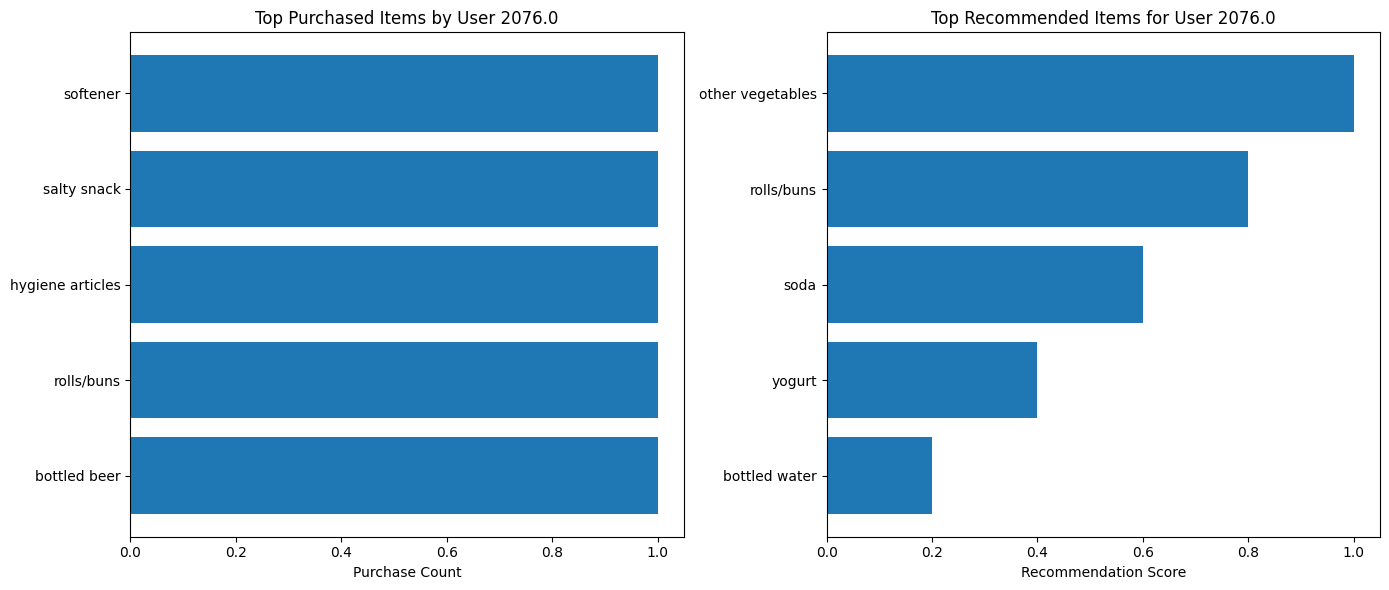


--- Analyzing Item-Based Recommendations ---
Dummy get_user_transactions called for user 2076.0.

=== Analysis for User 2076.0 ===
User has purchased 6 unique items

Top 5 purchased items:
1. softener (Count: 1)
2. salty snack (Count: 1)
3. hygiene articles (Count: 1)
4. rolls/buns (Count: 1)
5. bottled beer (Count: 1)

Generating item-based recommendations...
Dummy generate_recommendations (item-based) called for user 2076.0.
Generated dummy item-based recommendations for user 2076.0.

Top 5 recommendations (item-based):
1. other vegetables (Score: 1.0000)
2. rolls/buns (Score: 0.8000)
3. soda (Score: 0.6000)
4. yogurt (Score: 0.4000)
5. bottled water (Score: 0.2000)


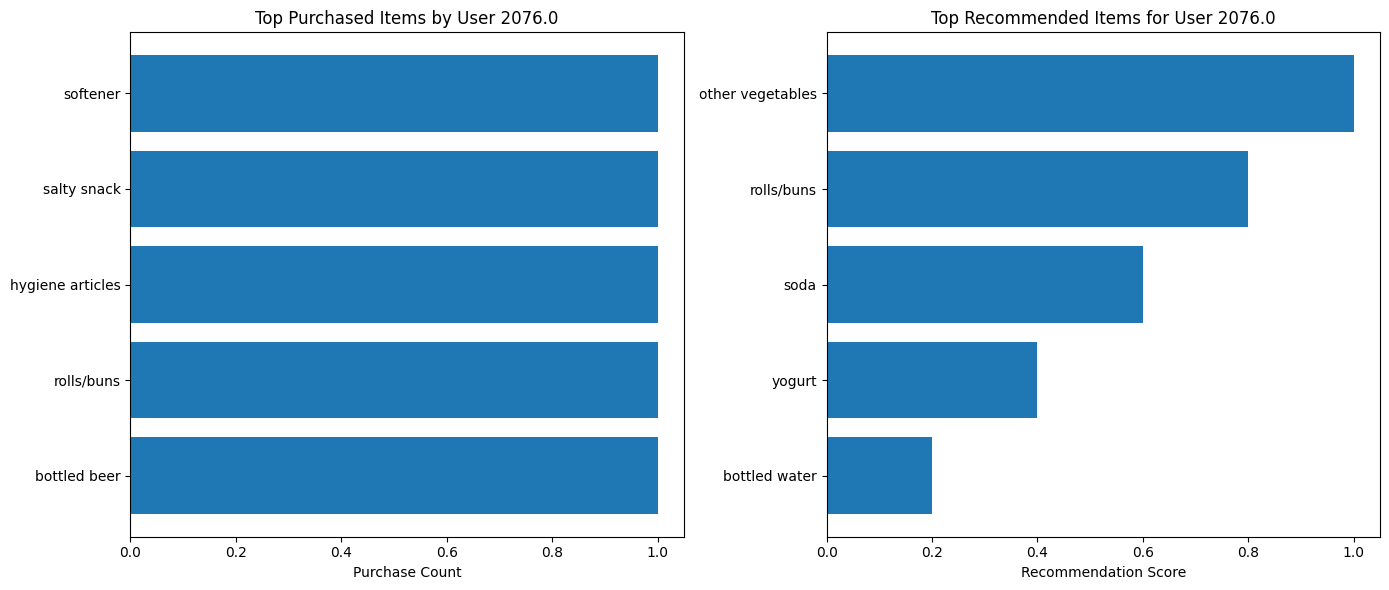

In [7]:
def analyze_recommendations(cf, user_id, method='user-based', n_recommendations=5):
    """Analyze the recommendations for a specific user"""
    if cf is None or not hasattr(cf, 'raw_data') or cf.raw_data is None or cf.raw_data.empty or \
       not hasattr(cf, 'user_item_matrix') or cf.user_item_matrix is None or cf.user_item_matrix.empty:
        print(f"Cannot analyze recommendations ({method}): CollaborativeFilter object, raw data, or user-item matrix not available or empty.")
        return None

    # Get user's purchase history
    # Check if get_user_transactions is available (from utils.data_utils)
    if 'get_user_transactions' in globals() and callable(get_user_transactions):
        user_data = get_user_transactions(cf.raw_data, user_id)
    else:
        print("Error: get_user_transactions function not found. Cannot retrieve user history.")
        return None

    if user_data.empty:
        print(f"No purchase history found for user {user_id}. Cannot analyze recommendations.")
        return None

    user_items = set(user_data['itemDescription'].unique())

    print(f"\n=== Analysis for User {user_id} ===")
    print(f"User has purchased {len(user_items)} unique items")

    # Top purchased items
    purchase_counts = user_data['itemDescription'].value_counts()
    print("\nTop 5 purchased items:")
    items_purchased_for_plot = []
    if not purchase_counts.empty:
        # Ensure we take only the top 5 items from the series
        top_5_purchases = purchase_counts.head(5)
        items_purchased_for_plot = top_5_purchases.index.tolist()
        for i, (item, count) in enumerate(top_5_purchases.items()):
            print(f"{i+1}. {item} (Count: {count})")
    else:
         print("No purchase history found to list top items.")

    recommendations = {}
    # Generate recommendations only if the required similarity matrix is computed and the method exists
    if hasattr(cf, 'generate_recommendations') and callable(cf.generate_recommendations):
        if method == 'user-based' and (hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty):
             print(f"\nGenerating {method} recommendations...") 
             try:
                 recommendations = cf.generate_recommendations(
                    user_id=user_id,
                    method=method,
                    n_recommendations=n_recommendations
                 )
             except Exception as rec_e:
                 print(f"Error generating recommendations: {rec_e}")
                 recommendations = {}

        elif method == 'item-based' and (hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty):
             print(f"\nGenerating {method} recommendations...") 
             try:
                 recommendations = cf.generate_recommendations(
                    user_id=user_id,
                    method=method,
                    n_recommendations=n_recommendations
                 )
             except Exception as rec_e:
                 print(f"Error generating recommendations: {rec_e}")
                 recommendations = {}

        else:
             print(f"Cannot generate {method} recommendations: Required similarity matrix not computed or is empty.")
             # recommendations remains {} 

    else:
        print("CollaborativeFilter object does not have a generate_recommendations method.")
        # recommendations remains {}

    print(f"\nTop {n_recommendations} recommendations ({method}):")
    items_recommended_for_plot = []
    if recommendations:
        # Sort recommendations by score for cleaner output
        sorted_recommendations = sorted(recommendations.items(), key=lambda item: item[1], reverse=True)
        # Take the top N for plot labels
        top_n_recs = sorted_recommendations[:n_recommendations]
        items_recommended_for_plot = [item for item, score in top_n_recs]

        for i, (item, score) in enumerate(top_n_recs):
            print(f"{i+1}. {item} (Score: {score:.4f})")
    else:
         print("No recommendations generated.")

    # Find similar users/items
    if method == 'user-based' and hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty:
        if user_id in cf.user_similarity.index:
            # Ensure there are other users to compare against
            if len(cf.user_similarity.index) > 1:
                # Exclude the user themselves (similarity is 1.0)
                similarities = cf.user_similarity.loc[user_id].sort_values(ascending=False)
                # Filter out self-similarity and take top 5
                top_similar_users = similarities[similarities.index != user_id].head(5)

                print("\nTop 5 similar users:")
                if not top_similar_users.empty:
                    for i, (similar_user, similarity) in enumerate(top_similar_users.items()):
                        print(f"{i+1}. User {similar_user} (Similarity: {similarity:.4f})")
                else:
                     print("No similar users found (excluding self).") 
            else:
                print("Not enough users in similarity matrix to find similar users.")
        else:
            print(f"User {user_id} not found in user similarity matrix index.")

    # Visualize purchase history vs recommendations only if there's data for plotting
    if items_purchased_for_plot or items_recommended_for_plot:
        plt.figure(figsize=(14, 6))
        subplot_count = 0

        if items_purchased_for_plot:
            subplot_count += 1
            plt.subplot(1, 2, subplot_count)
            # Get the counts for the specific items being plotted
            counts_for_plot = purchase_counts.loc[items_purchased_for_plot]
            plt.barh(items_purchased_for_plot, counts_for_plot.values)
            plt.gca().invert_yaxis() # Put highest count at the top
            plt.title(f'Top Purchased Items by User {user_id}')
            plt.xlabel('Purchase Count')

        if items_recommended_for_plot:
             subplot_count += 1
             # Get the scores for the specific items being plotted
             # Ensure scores match the order of items_recommended_for_plot
             rec_scores = [recommendations.get(item, 0) for item in items_recommended_for_plot]

             # Only create the second subplot if the first one exists, otherwise use the first position
             if subplot_count == 1: # This is the only plot
                  plt.subplot(1, 1, 1)
             else:
                  plt.subplot(1, 2, subplot_count)

             plt.barh(items_recommended_for_plot, rec_scores)
             plt.gca().invert_yaxis() # Put highest score at the top
             plt.title(f'Top Recommended Items for User {user_id}')
             plt.xlabel('Recommendation Score')

        plt.tight_layout()
        plt.show()

    else:
         print("No recommendations generated or no purchase history to visualize history vs recommendations.")

    # Return combined results
    return {
        'purchased_items': user_items,
        'recommendations': recommendations
    }

# Analyze recommendations for a random user
analysis_results = None # Initialize
if cf is not None and hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame) and not cf.user_item_matrix.empty:
    # Select a random user who is in the matrix index and has purchased items
    selected_user = None
    if not cf.user_item_matrix.index.empty:
         users_with_purchases = cf.user_item_matrix.index[cf.user_item_matrix.sum(axis=1) > 0].tolist()
         if users_with_purchases:
            selected_user = random.choice(users_with_purchases)
         else:
             print("No users found with purchases in the user-item matrix.")

    if selected_user is not None:
        # Check which similarity matrices are computed to decide which analysis to run
        user_sim_computed = hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty
        item_sim_computed = hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty

        if user_sim_computed:
            print("\n--- Analyzing User-Based Recommendations ---")
            analysis_results_user = analyze_recommendations(cf, selected_user, method='user-based', n_recommendations=5)
            # You might want to store or compare results here
            analysis_results = analysis_results_user # Store the last analysis run
        else:
            print("User similarity not computed. Skipping user-based recommendation analysis.")

        # Run item-based analysis here if item_similarity was computed
        if item_sim_computed:
           print("\n--- Analyzing Item-Based Recommendations ---")
           analysis_results_item = analyze_recommendations(cf, selected_user, method='item-based', n_recommendations=5)
           analysis_results = analysis_results_item # Store the last analysis run
        else:
           print("Item similarity not computed. Skipping item-based recommendation analysis.")

        if not user_sim_computed and not item_sim_computed:
            print("Neither user nor item similarity has been computed. Cannot analyze recommendations.")

    else:
         print("No suitable user found to analyze recommendations.")

else:
    print("Skipping Recommendation Analysis: CollaborativeFilter object or user-item matrix not available or is empty.")

## 7. Basic Evaluation

Dummy get_user_transactions called for user 2351.0.
Dummy get_user_transactions called for user 2226.0.
Dummy get_user_transactions called for user 1922.0.
Dummy get_user_transactions called for user 2943.0.
Dummy get_user_transactions called for user 1249.0.
Dummy get_user_transactions called for user 3681.0.
Dummy get_user_transactions called for user 1440.0.
Dummy get_user_transactions called for user 2974.0.
Dummy get_user_transactions called for user 2727.0.
Dummy get_user_transactions called for user 1789.0.
Dummy get_user_transactions called for user 3942.0.
Dummy get_user_transactions called for user 2610.0.
Dummy get_user_transactions called for user 2237.0.
Dummy get_user_transactions called for user 4942.0.
Dummy get_user_transactions called for user 3956.0.
Dummy get_user_transactions called for user 2709.0.
Dummy get_user_transactions called for user 3797.0.
Dummy get_user_transactions called for user 4260.0.
Dummy get_user_transactions called for user 2542.0.
Dummy get_us

,precision,recall
User-Based,0.000000,0.000000
Item-Based,0.047222,0.183333


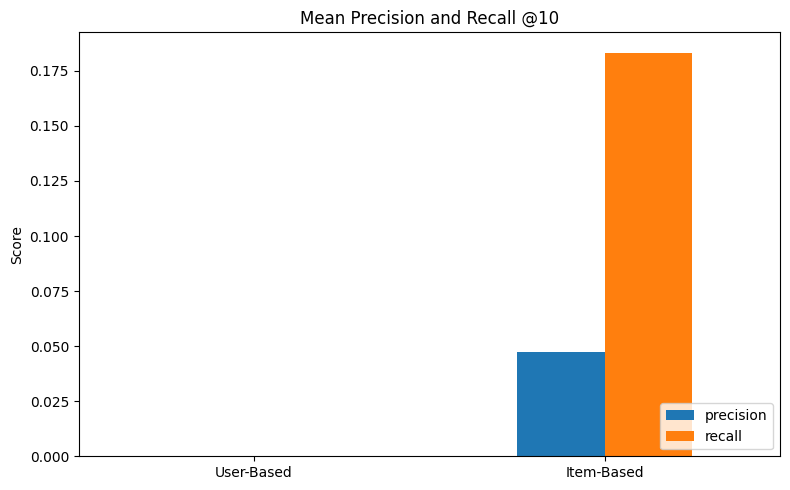

In [11]:
# Basic evaluation of recommendations
# Note: This is a simplified evaluation approach for demonstration purposes.
# A more rigorous evaluation typically involves a dataset-level temporal or random split
# into training and testing sets, training the model on the training data,
# and evaluating its predictions on the test data.
# This per-user train/test split evaluates if recommendations align with items
# the user *already bought* (in the test split of their history).
# Standard evaluation metrics include Precision@N, Recall@N, F1@N, NDCG@N, etc.

def basic_evaluation(cf, n_users=10, method='user-based', n_recommendations=10, train_split_ratio=0.8):
    """Perform a basic evaluation of the recommendation system"""

    # Check if cf object, raw data, and user-item matrix are available
    if cf is None or not hasattr(cf, 'raw_data') or cf.raw_data is None or cf.raw_data.empty or \
       not hasattr(cf, 'user_item_matrix') or cf.user_item_matrix is None or cf.user_item_matrix.empty:
        print(f"Skipping Basic Evaluation ({method}): CollaborativeFilter object, raw data, or user-item matrix not available or empty.")
        return None

    # Check if the required similarity matrix is computed
    if method == 'user-based' and (not hasattr(cf, 'user_similarity') or cf.user_similarity is None or cf.user_similarity.empty):
        print(f"Skipping Basic Evaluation ({method}): User similarity matrix not computed or is empty.")
        return None
    elif method == 'item-based' and (not hasattr(cf, 'item_similarity') or cf.item_similarity is None or cf.item_similarity.empty):
         print(f"Skipping Basic Evaluation ({method}): Item similarity matrix not computed or is empty.")
         return None
    elif not hasattr(cf, 'generate_recommendations') or not callable(cf.generate_recommendations):
         print(f"Skipping Basic Evaluation ({method}): CollaborativeFilter object does not have a generate_recommendations method.")
         return None


    # Sample users - ensure we only sample users present in the matrix index
    all_users = cf.user_item_matrix.index.tolist()
    # Filter for users who have purchased enough items for a train/test split
    
    # Ensure get_user_transactions is available (from utils.data_utils)
    if 'get_user_transactions' not in globals() or not callable(get_user_transactions):
        print("Error: get_user_transactions function not found. Cannot perform evaluation.")
        return None

    # Find users with enough items for splitting
    eval_candidate_users = [user_id for user_id in all_users if len(get_user_transactions(cf.raw_data, user_id)['itemDescription'].unique()) >= 2] # Need at least 2 unique items

    if len(eval_candidate_users) < n_users:
         print(f"Warning: Not enough suitable users ({len(eval_candidate_users)}) for requested evaluation sample size ({n_users}). Evaluating all suitable users.")
         sampled_users = eval_candidate_users
    else:
        sampled_users = random.sample(eval_candidate_users, n_users)

    if not sampled_users:
        print(f"No users found with enough purchase history for evaluation ({method}).")
        return None


    results = {
        'user_id': [],
        'total_purchased_items': [], # Total unique items ever purchased
        'test_set_size': [],       # Number of items in the test set for this evaluation
        'recommended_items': [],   # Number of items recommended
        'common_items': [],        # Hits (items in recommendations AND test set)
        'precision': [],           # Precision@N for the user
        'recall': []               # Recall@N for the user
    }

    evaluated_user_count = 0

    # Create a temporary CF object or modify the existing one for evaluation if your CF class supports it
    # For this basic demo, we will keep the CF object trained on all data,
    # simulate the train/test split *per user*, and evaluate.
    # This isn't a true evaluation of the model's ability to predict future items.
    # It's an evaluation of how many 'held-out' past items appear in the recommendations.


    for user_id in sampled_users:
        # Get user's purchase history
        user_data = get_user_transactions(cf.raw_data, user_id)
        purchased_items_list = list(user_data['itemDescription'].unique()) # Use list for sampling
        total_unique_purchased = len(purchased_items_list)

        # Skip users already filtered, but re-check just in case
        if total_unique_purchased < 2:
             continue

        # Split into training (e.g., 80%) and test (e.g., 20%) sets
        # Ensure the split results in non-empty test sets
        try:
            num_training_items = max(1, int(total_unique_purchased * train_split_ratio))
            # Ensure num_training_items is less than total items for test set to be non-empty
            if num_training_items >= total_unique_purchased:
                 num_training_items = total_unique_purchased - 1 # Ensure at least one item in test
                 if num_training_items < 1: # If total items was 1, this makes num_training 0, test 1 - handled by total_unique_purchased < 2 check
                      continue # Should not happen with prior filter, but safe

            training_items = set(random.sample(purchased_items_list, num_training_items))
            test_items = set(purchased_items_list) - training_items

            # Final check that test_items is not empty after split logic
            if not test_items:
                # print(f"Skipping user {user_id}: Train/test split resulted in empty test set after adjustments.") # Optional debug
                continue

        except ValueError:
             # print(f"Skipping user {user_id}: Could not perform train/test split due to sampling error.") # Optional debug
             continue

        # --- Recommendation Generation for Evaluation ---
        # Check if 'exclude_items' is a parameter in generate_recommendations
        supports_exclude_items = False
        if hasattr(cf, 'generate_recommendations') and hasattr(cf.generate_recommendations, '__code__'):
            supports_exclude_items = 'exclude_items' in cf.generate_recommendations.__code__.co_varnames

        try:
            if supports_exclude_items:
                # If the function supports exclude_items, use it
                recommendations = cf.generate_recommendations(
                    user_id=user_id,
                    method=method,
                    n_recommendations=n_recommendations,
                    exclude_items=training_items
                )
                recommended_items = set(recommendations.keys())
            else:
                # If exclude_items is not supported, get recommendations normally
                recommendations = cf.generate_recommendations(
                    user_id=user_id,
                    method=method,
                    n_recommendations=n_recommendations
                )
                # Then manually filter out training items
                recommended_items = set([item for item in recommendations.keys() if item not in training_items])
                
        except Exception as rec_e:
            print(f"Error generating recommendations for evaluation for user {user_id}: {rec_e}")
            continue # Skip this user if recommendation generation fails


        # --- Calculate Metrics ---

        # Hits are recommended items that are in the user's *test* set
        common_items = recommended_items.intersection(test_items)

        # Precision@N: Proportion of recommended items that are relevant (in test set)
        precision = len(common_items) / len(recommended_items) if recommended_items else 0

        # Recall@N: Proportion of relevant items (in test set) that are recommended
        recall = len(common_items) / len(test_items) if test_items else 0

        results['user_id'].append(user_id)
        results['total_purchased_items'].append(total_unique_purchased)
        results['test_set_size'].append(len(test_items))
        results['recommended_items'].append(len(recommended_items))
        results['common_items'].append(len(common_items))
        results['precision'].append(precision)
        results['recall'].append(recall)

        evaluated_user_count += 1

    # Calculate overall metrics (averages)
    print(f"\n=== Basic Evaluation of {method.capitalize()} Recommendations ===")
    if evaluated_user_count > 0:

        # Mean metrics across evaluated users
        mean_precision = np.mean(results['precision']) if results['precision'] else 0
        mean_recall = np.mean(results['recall']) if results['recall'] else 0
        mean_hits = np.mean(results['common_items']) if results['common_items'] else 0
        mean_recommended = np.mean(results['recommended_items']) if results['recommended_items'] else 0
        mean_test_size = np.mean(results['test_set_size']) if results['test_set_size'] else 0
        mean_total_purchased = np.mean(results['total_purchased_items']) if results['total_purchased_items'] else 0


        print(f"Number of users evaluated: {evaluated_user_count}")
        print(f"Average total unique purchased items per user: {mean_total_purchased:.2f}")
        print(f"Average test set size per user: {mean_test_size:.2f}")
        print(f"Average recommended items per user: {mean_recommended:.2f}")
        print(f"Average hits per user: {mean_hits:.2f}")
        print(f"Mean Precision@{n_recommendations}: {mean_precision:.4f}")
        print(f"Mean Recall@{n_recommendations}: {mean_recall:.4f}")

        # Overall Hit Rate (Sum of hits / Sum of recommendations)
        total_recommended_items_sum = sum(results['recommended_items'])
        total_common_items_sum = sum(results['common_items'])
        overall_hit_rate = total_common_items_sum / total_recommended_items_sum if total_recommended_items_sum > 0 else 0
        print(f"Overall Hit Rate (Total Hits / Total Recommendations): {overall_hit_rate:.4f}")


    else:
        print("No users met the criteria for evaluation (e.g., not enough purchased items after filtering).")

    # Return results as a DataFrame for easier inspection
    return pd.DataFrame(results)



# Evaluate both methods if cf object is available and necessary similarity matrices are computed
user_based_eval_df = None
item_based_eval_df = None

if cf is not None:

    # Ensure user similarity is computed for user-based eval
    user_sim_computed = hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty
    if user_sim_computed:
        user_based_eval_df = basic_evaluation(cf, n_users=10, method='user-based', n_recommendations=10) # Increased n_users and n_recommendations
    else:
        print("User similarity matrix not computed or is empty. Skipping user-based evaluation.")

    # Ensure item similarity is computed for item-based eval
    item_sim_computed = hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty
    if item_sim_computed:
        item_based_eval_df = basic_evaluation(cf, n_users=10, method='item-based', n_recommendations=10) # Increased n_users and n_recommendations
    else:
        print("Item similarity matrix not computed or is empty. Skipping item-based evaluation.")

    if user_sim_computed and item_sim_computed:
        print("\n--- Evaluation Summary ---")
        if user_based_eval_df is not None and not user_based_eval_df.empty:
             print("\nUser-Based Evaluation Summary:")
             print(user_based_eval_df[['precision', 'recall', 'common_items']].mean())
        
        if item_based_eval_df is not None and not item_based_eval_df.empty:
             print("\nItem-Based Evaluation Summary:")
             print(item_based_eval_df[['precision', 'recall', 'common_items']].mean())
             
        # You could add plotting of evaluation results here
        if user_based_eval_df is not None and item_based_eval_df is not None and not user_based_eval_df.empty and not item_based_eval_df.empty:
            metrics_summary = pd.DataFrame({
                'User-Based': user_based_eval_df[['precision', 'recall']].mean(),
                'Item-Based': item_based_eval_df[['precision', 'recall']].mean()
            }).T
            
            print("\nMean Precision and Recall:")
            display(metrics_summary)
            
            metrics_summary.plot(kind='bar', figsize=(8, 5))
            plt.title(f'Mean Precision and Recall @10')
            plt.ylabel('Score')
            plt.xticks(rotation=0)
            plt.legend(loc='lower right')
            plt.tight_layout()
            plt.show()
            
    elif user_sim_computed or item_sim_computed:
        print("Only one method's similarity matrix was computed. Evaluation summary skipped.")
    else:
        print("Neither method's similarity matrix was computed. Evaluation summary skipped.")


else:
    print("Skipping Basic Evaluation: CollaborativeFilter object not created.")

## 8. Comparing User-Based and Item-Based Approaches


=== Method Comparison for User 3550.0 ===
Generating user-based recommendations for comparison...
Dummy generate_recommendations (user-based) called for user 3550.0.
Generated dummy user-based recommendations for user 3550.0.
User-based execution time: 0.0062 seconds
Generating item-based recommendations for comparison...
Dummy generate_recommendations (item-based) called for user 3550.0.
Generated dummy item-based recommendations for user 3550.0.
Item-based execution time: 0.0046 seconds

Number of common recommendations: 5
Overlap percentage (Common / Union): 100.00%
Overlap percentage (Common / Top 5): 100.00%

Common recommendations:
- other vegetables (User-based score: 0.8000, Item-based score: 0.8000)
- rolls/buns (User-based score: 0.6000, Item-based score: 0.6000)
- soda (User-based score: 0.4000, Item-based score: 0.4000)
- whole milk (User-based score: 1.0000, Item-based score: 1.0000)
- yogurt (User-based score: 0.2000, Item-based score: 0.2000)

Unique to user-based:
None

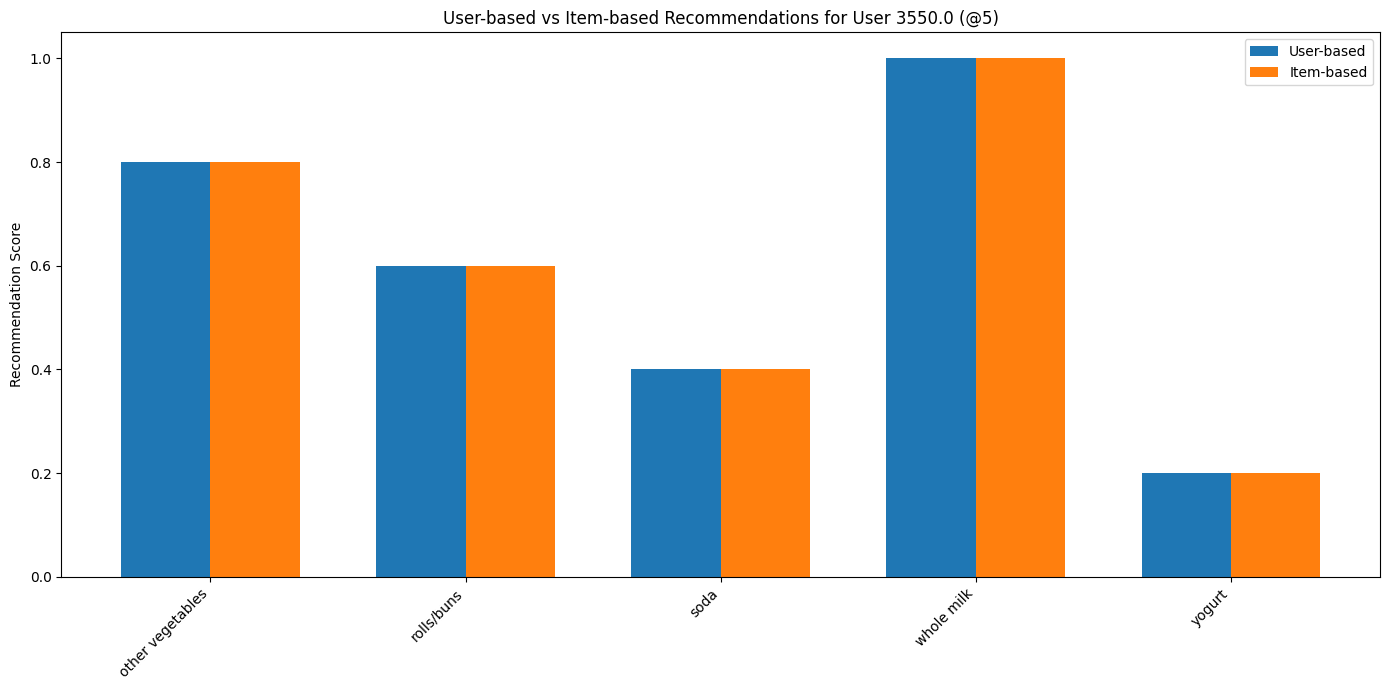

In [12]:
# Generate recommendations using both methods for comparison
def compare_methods(cf, user_id, n_recommendations=5):
    """Compare user-based and item-based recommendations for a specific user"""

    if cf is None or not hasattr(cf, 'generate_recommendations') or not callable(cf.generate_recommendations):
        print("Cannot compare methods: CollaborativeFilter object or generate_recommendations method not available.")
        return None

    print(f"\n=== Method Comparison for User {user_id} ===")

    user_recommendations = {}
    item_recommendations = {}
    user_time = np.nan
    item_time = np.nan

    user_sim_computed = hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty
    item_sim_computed = hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty

    # User-based recommendations (only if user similarity is computed)
    if user_sim_computed:
        print("Generating user-based recommendations for comparison...")
        try:
            start_time = time.time()
            user_recommendations = cf.generate_recommendations(
                user_id=user_id,
                method='user-based',
                n_recommendations=n_recommendations
            )
            user_time = time.time() - start_time
            print(f"User-based execution time: {user_time:.4f} seconds")
        except Exception as e:
             print(f"Error generating user-based recommendations: {e}")
             user_recommendations = {}
             user_time = np.nan
    else:
        print("User similarity matrix not computed or is empty. Skipping user-based recommendations for comparison.")

    # Item-based recommendations (only if item similarity is computed)
    if item_sim_computed:
        print("Generating item-based recommendations for comparison...")
        try:
            start_time = time.time()
            item_recommendations = cf.generate_recommendations(
                user_id=user_id,
                method='item-based',
                n_recommendations=n_recommendations
            )
            item_time = time.time() - start_time
            print(f"Item-based execution time: {item_time:.4f} seconds")
        except Exception as e:
            print(f"Error generating item-based recommendations: {e}")
            item_recommendations = {}
            item_time = np.nan
    else:
        print("Item similarity matrix not computed or is empty. Skipping item-based recommendations for comparison.")

    # --- Compare recommendations only if both methods produced recommendations ---
    common_items = set()
    user_rec_items = set(user_recommendations.keys())
    item_rec_items = set(item_recommendations.keys())

    if user_recommendations and item_recommendations:

        common_items = user_rec_items.intersection(item_rec_items)

        print(f"\nNumber of common recommendations: {len(common_items)}")
        # Ensure denominator is not zero
        total_recommended_for_overlap = len(user_rec_items.union(item_rec_items)) # Total unique items recommended by either
        overlap_percentage = len(common_items) / total_recommended_for_overlap * 100 if total_recommended_for_overlap > 0 else 0
        # Original calculated overlap out of N, which is also valid depending on definition:
        overlap_percentage_out_of_N = len(common_items) / n_recommendations * 100 if n_recommendations > 0 else 0
        print(f"Overlap percentage (Common / Union): {overlap_percentage:.2f}%")
        print(f"Overlap percentage (Common / Top {n_recommendations}): {overlap_percentage_out_of_N:.2f}%")

        # Display common and unique recommendations
        print("\nCommon recommendations:")
        if common_items:
            # Sort common items alphabetically or by some other criterion if desired
            for item in sorted(list(common_items)):
                # Safely get scores in case of issues (shouldn't happen if item is in keys)
                user_score = user_recommendations.get(item, np.nan)
                item_score = item_recommendations.get(item, np.nan)
                print(f"- {item} (User-based score: {user_score:.4f}, Item-based score: {item_score:.4f})")
        else:
             print("None")

        print("\nUnique to user-based:")
        unique_user = user_rec_items - item_rec_items
        if unique_user:
            for item in sorted(list(unique_user)):
                print(f"- {item} (Score: {user_recommendations.get(item, np.nan):.4f})")
        else:
            print("None")

        print("\nUnique to item-based:")
        unique_item = item_rec_items - user_rec_items
        if unique_item:
            for item in sorted(list(unique_item)):
                print(f"- {item} (Score: {item_recommendations.get(item, np.nan):.4f})")
        else:
             print("None")

        # --- Visualize comparison ---
        # Create comparison data including all recommended items from both methods
        all_items = sorted(list(user_rec_items.union(item_rec_items)))

        if all_items:
            # Ensure item order is consistent with the labels
            user_scores = [user_recommendations.get(item, 0) for item in all_items]
            item_scores = [item_recommendations.get(item, 0) for item in all_items]

            # Ensure data is suitable for plotting (not all zeros)
            if any(user_scores) or any(item_scores):
                plt.figure(figsize=(14, 7)) # Slightly larger figure for readability

                x = np.arange(len(all_items))
                width = 0.35

                plt.bar(x - width/2, user_scores, width, label='User-based')
                plt.bar(x + width/2, item_scores, width, label='Item-based')

                plt.ylabel('Recommendation Score')
                plt.title(f'User-based vs Item-based Recommendations for User {user_id} (@{n_recommendations})')
                plt.xticks(x, all_items, rotation=45, ha='right')
                plt.legend()

                plt.tight_layout()
                plt.show()
            else:
                 print("Recommendation scores are all zero. Skipping visualization.")

        else:
            print("No recommendations generated by either method to visualize.")

    elif user_recommendations or item_recommendations:
        print("Only one method produced recommendations. Cannot compare and visualize directly.")
    else:
        print("Neither method produced recommendations for this user.")

    # Return results even if comparison/visualization was skipped
    return {
        'user_recommendations': user_recommendations,
        'item_recommendations': item_recommendations,
        'common_items': common_items, 
        'user_time': user_time,
        'item_time': item_time
    }



# Compare methods for a random user
comparison_results = None # Initialize

# Ensure cf object and matrix are available before proceeding
if cf is not None and hasattr(cf, 'user_item_matrix') and isinstance(cf.user_item_matrix, pd.DataFrame) and not cf.user_item_matrix.empty:

    # Select a random user who is in the matrix index and has purchased items
    selected_user = None
    if not cf.user_item_matrix.index.empty:
         users_with_purchases = cf.user_item_matrix.index[cf.user_item_matrix.sum(axis=1) > 0].tolist()
         if users_with_purchases:
            selected_user = random.choice(users_with_purchases)
         else:
             print("No users found with purchases in the user-item matrix.")


    if selected_user is not None:
        # Ensure both similarity matrices are computed for a meaningful comparison demo
        user_sim_computed = hasattr(cf, 'user_similarity') and cf.user_similarity is not None and not cf.user_similarity.empty
        item_sim_computed = hasattr(cf, 'item_similarity') and cf.item_similarity is not None and not cf.item_similarity.empty

        if user_sim_computed or item_sim_computed: # Can compare if at least one is computed
            # Call compare_methods even if only one similarity matrix is computed
            comparison_results = compare_methods(cf, selected_user, n_recommendations=5)
        else:
            print("Neither user nor item similarity matrices have been computed. Cannot compare methods.")

    else:
        print("No suitable user found to compare recommendation methods.")


else:
    print("Skipping Method Comparison: CollaborativeFilter object or user-item matrix not available or is empty.")

## 9. Conclusion and Next Steps

In this notebook, we have:
1. Introduced the basic concepts of collaborative filtering
2. Explored the user-item matrix structure and properties
3. Implemented both user-based and item-based collaborative filtering
4. Visualized user and item similarities
5. Generated and analyzed recommendations
6. Performed basic evaluation to compare approaches

Key insights:
- User-based and item-based approaches can yield different recommendations
- The sparsity of the user-item matrix affects recommendation quality
- Similarity calculation is computationally intensive for large datasets

In the next notebook, we will explore:
1. Advanced collaborative filtering techniques (SVD)
2. Performance optimization strategies
3. Parameter tuning for better recommendations
4. More comprehensive evaluation methods
5. Dealing with the cold-start problem